<a href="https://colab.research.google.com/github/sajjadh/Ballet-Posture-Classification-Model/blob/main/Classification_Model_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Feature Engineering & Pre-Processing

In [ ]:
import time
import pandas as pd
import os
import numpy as np 
import tensorflow as tf

# visual libraries
from matplotlib import pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D 
plt.style.use('ggplot')

# sklearn libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef,classification_report,roc_curve
from sklearn.externals import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


## 1. Data Analysis

In [ ]:
# Read the data in the CSV file using pandas
# Read the data in the CSV file using pandas

Piroutte_Train_Unbalanced = '/content/drive/MyDrive/FYP Material/balletSkeletonExtraction/Pirouette_OutPut/Pirouette_Train.csv'
Piroutte_Test = '/content/drive/MyDrive/FYP Material/balletSkeletonExtraction/Pirouette_OutPut/Pirouette_Test.csv'

Passe_Train_Unbalanced = '/content/drive/MyDrive/FYP Material/balletSkeletonExtraction/Passe_OutPut/Passe_Train.csv'
Passe_Test = '/content/drive/MyDrive/FYP Material/balletSkeletonExtraction/Passe_OutPut/Passe_Test.csv'

Arabesque_Train_Unbalanced = '/content/drive/MyDrive/FYP Material/balletSkeletonExtraction/Arabesque_OutPut/Arabesque_Train.csv'
Arabesque_Test = '/content/drive/MyDrive/FYP Material/balletSkeletonExtraction/Arabesque_OutPut/Arabesque_Test.csv'


###1.1 Merging CSV Files
*Getting the dataframes*

*Merging all the DF to make 1 DF*

In [ ]:
# df = pd.read_csv(CSV_Path, header=None, usecols=[75,76])
#Getting all the DF 
df_Piroutte_Train_Unbalanced = pd.read_csv(Piroutte_Train_Unbalanced, header=None)
df_Arabesque_Train_Unbalanced = pd.read_csv(Arabesque_Train_Unbalanced, header=None)
df_Passe_Train_Unbalanced = pd.read_csv(Passe_Train_Unbalanced, header=None)

df_Piroutte_Test_Unbalanced = pd.read_csv(Piroutte_Test, header=None)
df_Passe_Test_Unbalanced = pd.read_csv(Passe_Test, header=None)
df_Arabesque_Test_Unbalanced = pd.read_csv(Arabesque_Test, header=None)

Passe = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/new_dataset/passe.csv', header=None)
Arabesque = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/new_dataset/Arabesque.csv', header=None)
Piroutte = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/new_dataset/Pirouette.csv', header=None)


# Merging all 3 trainning + 3 testing csv trainning data files
# pieces = [df_Piroutte_Train_Unbalanced,df_Arabesque_Train_Unbalanced,df_Passe_Train_Unbalanced,df_Piroutte_Test_Unbalanced,df_Passe_Test_Unbalanced,df_Arabesque_Test_Unbalanced]

pieces = [Passe, Arabesque, Piroutte]
df_train_Unbalanced= pd.concat(pieces)
df_train_Normalize= pd.concat(pieces)
df_train_Unbalanced


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76
0,765.861,227.240,0.890077,801.011,333.066,0.806048,730.440,341.865,0.799534,712.689,459.667,0.830472,783.406,556.718,0.827871,871.718,315.541,0.789056,957.103,341.859,0.829526,904.011,412.685,0.759566,815.748,565.600,0.605822,765.678,568.503,0.576799,753.957,768.697,0.759308,839.392,918.778,0.624480,865.852,562.655,0.576096,912.913,748.129,0.771619,812.891,945.225,0.761195,751.084,221.064,0.870137,786.388,212.427,0.901231,742.087,230.043,0.315070,815.870,221.301,0.915455,892.279,983.539,0.334228,889.319,974.642,0.339860,792.217,959.966,0.759146,903.937,980.694,0.626953,883.394,983.611,0.543763,836.357,933.554,0.189412,passe_01,1
1,765.752,224.073,0.951638,795.203,321.409,0.827702,727.495,338.929,0.793610,712.766,453.693,0.814427,786.231,550.739,0.805831,868.715,315.309,0.774176,957.023,318.482,0.813774,901.066,391.922,0.730660,812.997,559.700,0.649862,765.650,562.669,0.616120,756.884,765.735,0.800178,842.337,921.725,0.642564,865.849,556.769,0.628774,915.865,742.283,0.823539,815.733,936.521,0.741987,748.120,206.586,0.846678,786.265,200.755,0.935699,739.321,224.138,0.302148,813.019,215.289,0.859341,883.535,983.511,0.318170,883.467,974.664,0.352019,795.141,954.199,0.724994,904.045,980.635,0.638382,883.470,983.542,0.549621,842.249,936.449,0.220154,passe_01,1
2,765.635,218.310,0.911253,798.120,318.351,0.860900,724.618,333.030,0.766081,712.699,444.884,0.798166,780.428,530.398,0.802875,871.697,306.616,0.722115,954.198,306.618,0.678858,901.077,362.496,0.616623,812.989,550.863,0.656922,765.631,553.776,0.622921,759.854,765.630,0.813754,848.159,921.745,0.640354,865.786,547.925,0.630574,918.813,739.120,0.813660,818.719,936.455,0.711297,745.206,200.730,0.908931,786.177,197.690,0.929100,739.257,221.243,0.348476,812.957,203.572,0.903450,883.432,980.654,0.298917,883.430,974.602,0.345955,798.157,954.220,0.675331,904.090,980.664,0.656633,883.526,983.523,0.567872,848.170,936.500,0.217667,passe_01,1
3,762.898,206.503,0.889496,795.235,315.392,0.851295,724.532,321.297,0.788624,709.847,438.988,0.813833,783.453,530.167,0.798892,871.735,297.762,0.751687,954.102,291.819,0.698908,895.238,338.870,0.486360,815.771,553.797,0.682289,765.675,556.758,0.644651,762.692,756.955,0.769753,851.079,918.791,0.628033,868.749,550.911,0.655073,921.693,721.694,0.789888,827.510,927.715,0.694213,745.088,194.814,0.895781,783.349,188.898,0.862366,736.328,203.656,0.376869,812.796,197.808,0.948483,880.572,977.635,0.283046,883.446,968.788,0.322619,806.841,951.168,0.606614,903.982,977.772,0.626196,883.444,980.560,0.556232,851.089,939.369,0.229476,passe_01,1
4,762.760,197.818,0.925705,795.176,303.617,0.814792,721.674,315.453,0.809577,709.861,430.150,0.808207,777.523,509.741,0.771102,868.715,291.939,0.769440,954.156,271.171,0.697279,904.168,309.536,0.564598,815.769,547.969,0.686571,765.731,550.919,0.664881,762.709,745.131,0.774435,853.999,927.546,0.672526,868.720,545.023,0.644838,924.626,718.651,0.835575,830.435,924.632,0.713810,742.256,182.983,0.895883,777.564,177.145,0.881016,736.354,200.618,0.350006,810.019,191.760,0.884200,786.349,977.663,0.474356,803.976,980.563,0.446551,809.955,936.498,0.524195,901.105,977.737,0.683413,880.621,977.767,0.600424,857.028,951.095,0.353021,passe_01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4954,853.952,250.729,0.877319,883.392,383.069,0.901326,812.852,383.093,0.809182,692.233,303.604,0.803842,583.241,203.564,0.796226,951.270,380.225,0.773949,1092.490,392.073,0.844106,1216.120,397.836,0.798309,880.509,612.732,0.685832,851.051,615.663,0.609973,957.026,765.862,0.7

In [ ]:
Arabesque

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76
0,665.664,265.297,0.867665,598.029,362.387,0.871746,568.567,339.044,0.829659,521.497,409.613,0.880363,577.394,506.750,0.897580,627.438,380.116,0.780411,706.901,477.234,0.765124,786.261,553.807,0.862968,577.481,603.831,0.675132,553.895,600.887,0.630370,589.113,827.503,0.800188,527.215,1001.340,0.852633,603.843,606.859,0.626644,718.550,768.755,0.859124,836.299,948.250,0.799698,647.961,244.820,0.965370,0.000,0.000,0.000000,600.903,253.580,0.889570,0.000,0.000,0.000000,883.479,1007.140,0.658622,889.310,998.232,0.632781,839.355,957.038,0.638737,556.859,1048.210,0.731392,533.252,1048.240,0.776337,509.766,1018.880,0.752249,Arabesque_01,2
1,671.482,259.531,0.884480,603.921,362.424,0.841948,574.501,339.085,0.847737,530.175,409.532,0.916837,577.278,497.853,0.844367,642.143,383.033,0.797603,718.545,477.250,0.833438,798.118,553.819,0.812235,592.055,615.594,0.642813,565.568,606.818,0.588390,592.103,821.713,0.801273,527.227,1004.100,0.852047,618.547,621.447,0.645716,721.616,768.761,0.816371,836.435,948.274,0.810471,656.815,244.779,0.900022,0.000,0.000,0.000000,612.679,253.573,0.837113,0.000,0.000,0.000000,895.243,1015.890,0.695845,901.091,1001.190,0.702919,836.433,960.022,0.666833,556.860,1048.230,0.732848,533.264,1048.260,0.780735,512.570,1018.910,0.756478,Arabesque_01,2
2,683.275,259.477,0.823090,618.635,362.426,0.861421,583.336,338.985,0.816573,533.350,406.589,0.845816,574.555,483.108,0.921136,648.102,383.039,0.805594,736.260,480.143,0.820681,815.855,553.942,0.813498,597.999,615.673,0.688210,574.334,609.723,0.609820,595.089,821.652,0.824128,527.197,1001.330,0.858039,624.400,621.490,0.676475,730.432,771.600,0.799752,839.366,951.210,0.817436,668.548,244.671,0.935617,0.000,0.000,0.000000,621.569,250.686,0.904630,0.000,0.000,0.000000,903.947,1018.830,0.734286,904.133,1001.270,0.725904,836.467,968.799,0.702105,556.836,1048.250,0.726944,533.249,1048.270,0.789409,509.712,1018.840,0.773223,Arabesque_01,2
3,692.217,253.594,0.898009,627.368,359.509,0.842178,597.963,338.877,0.850447,550.806,394.937,0.851067,574.455,462.652,0.887888,665.620,380.125,0.777538,742.315,471.472,0.809014,836.337,550.832,0.865383,603.836,609.745,0.675903,577.413,601.019,0.649666,597.914,818.759,0.846224,524.425,1001.300,0.854657,630.390,618.550,0.634487,739.109,771.617,0.826674,842.273,951.246,0.811103,674.585,241.836,0.885346,0.000,0.000,0.000000,630.436,250.685,0.858508,0.000,0.000,0.000000,904.018,1018.810,0.744721,906.952,1001.280,0.725598,839.341,968.812,0.686425,559.696,1048.260,0.711035,533.265,1048.280,0.779467,506.823,1018.790,0.771444,Arabesque_01,2
4,703.968,253.616,0.845837,644.933,359.524,0.854221,609.705,336.038,0.805848,559.780,388.951,0.865949,574.310,450.746,0.851298,671.657,380.120,0.790686,765.648,471.448,0.824484,857.074,544.940,0.841774,621.376,615.591,0.662492,592.057,603.901,0.596750,600.836,815.832,0.856279,524.403,1001.140,0.854610,645.165,621.475,0.676243,742.240,774.606,0.836446,851.075,957.033,0.798115,692.085,241.833,0.911383,0.000,0.000,0.000000,645.145,247.900,0.939585,0.000,0.000,0.000000,906.925,1021.680,0.800715,907.164,1004.160,0.748162,839.414,974.703,0.757764,559.695,1048.240,0.692092,533.229,1048.240,0.764710,506.659,1010.020,0.742245,Arabesque_01,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4907,815.783,297.749,0.884094,886.447,368.473,0.691613,883.550,365.513,0.624635,0.000,0.000,0.000000,0.000,0.000,0.000000,892.268,380.116,0.745886,910.059,483.158,0.621622,880.581,527.280,0.764182,977.700,556.835,0.600417,998.328,547.987,0.507284,1095.370,671.502,0.7

**Find Skeleton Columns and Confidnece Score Columns**

In [ ]:
confidenceScoreColumns = []
skeletonJointColumn = []

droppingColumnsHeaders=[]
skeletonJointColumnHeaders =[] 


for column in range (75):
  if(column<47):
    skeletonJointColumnHeaders.append(column) 
  if(column<25):
    droppingColumnsHeaders.append(column) 
  #Column numbers that has skeleton joints values
  if (column%3 != 2):
    skeletonJointColumn.append(column)
  #Column numbers that has confidence score
  else:
    confidenceScoreColumns.append(column)

print("Confidence Score columns Headers: " ,sorted(droppingColumnsHeaders))
print("Confidence Score columns : " ,sorted(confidenceScoreColumns))
print('-------------------------------------')
print("Skeleto Joints columns Headers : " ,sorted(skeletonJointColumnHeaders))
print("Skeleto Joints columns : " ,sorted(skeletonJointColumn))


#assign the confidense score dataframe
# df_confidenceScore = df.drop(columns=droppingColumns)

Confidence Score columns Headers:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
Confidence Score columns :  [2, 5, 8, 11, 14, 17, 20, 23, 26, 29, 32, 35, 38, 41, 44, 47, 50, 53, 56, 59, 62, 65, 68, 71, 74]
-------------------------------------
Skeleto Joints columns Headers :  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]
Skeleto Joints columns :  [0, 1, 3, 4, 6, 7, 9, 10, 12, 13, 15, 16, 18, 19, 21, 22, 24, 25, 27, 28, 30, 31, 33, 34, 36, 37, 39, 40, 42, 43, 45, 46, 48, 49, 51, 52, 54, 55, 57, 58, 60, 61, 63, 64, 66, 67, 69, 70, 72, 73]


### 1.2. Exploratory Data Analsis

1.2.1.*Checking the frequnecy of each classs*

In [ ]:
# #Checking Frequncy of the given csv files
# All = df_train_Unbalanced.shape[0]

# piruoette = df_train_Unbalanced[df_train_Unbalanced[76] == 3]
# arabesque = df_train_Unbalanced[df_train_Unbalanced[76] == 2]
# passe = df_train_Unbalanced[df_train_Unbalanced[76] == 1]

# x = len(piruoette)/All
# y = len(arabesque)/All
# z = len(passe)/All


# print('Percentage Frequncy of each class')
# print('piruoette :',x*100,'%')
# print('arabesque :',y*100,'%')
# print('passe :',z*100,'%')

# print('---------------------------')
# print('accuracy count of each class')
# df_train_Unbalanced.value_counts(df_train_Unbalanced[76], sort = True)


1.2.2. *Graphical frequncy distribution of each class*

Text(0, 0.5, 'Frequency')

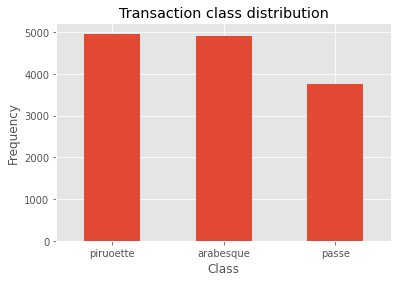

In [ ]:
# Let's plot the class frequncy graph
labels = ['piruoette','arabesque', 'passe']
classes = df_train_Unbalanced.value_counts(df_train_Unbalanced[76], sort = True)
classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(3), labels)
plt.xlabel("Class")
plt.ylabel("Frequency")

1.2.3.  *Remove Skeleton points from the DF* 

*Use this to drop SkeletonJoints column and take only the confidence score column to df_train*

In [ ]:
#Drop Skeleton Joints column 
# def dropSkeletonJoints():
#   for i in skeletonJointColumn:
#     del df_train_Unbalanced[i]

# df_train_Unbalanced

1.2.4.  *Remove confidence points from the DF* 

*Use this to drop Confidence score columns and take only the SkeletonJoints column to df_train*

In [ ]:
#Drop Confidence score column 
# def dropConfidenceScore():
#   for i in confidenceScoreColumns:
#     del df_train_Normalize[i]

# df_train_Normalize

1.2.5.   *Average confidence score of each joints*

*Check the average of confindence score of each skeleton join*

0     860.302249
1     215.507505
2       0.783189
3     929.764710
4     323.673302
         ...    
71      0.474172
72    898.808966
73    781.177522
74      0.568661
76      2.089240
Length: 76, dtype: float64


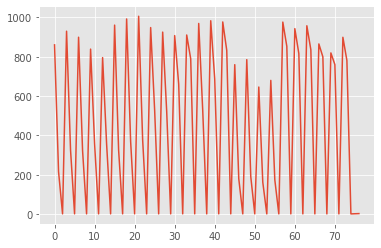

In [ ]:
# renaming the headers of confidense score dataframe
# df_train_Unbalanced.columns = [droppingColumnsHeaders]

#plotting the graph
df_train_Unbalanced.mean().plot(kind='line')
print(df_train_Unbalanced.mean())
# df_train

## 2. Handling Unbalanced Datasets

    
  3 class => Each class has 50 video => 150 videos in total
  Each video will be modified to have 100 frames

    1. video having more than 100 frames ==> Remove frames randomely
    2. Videos having less than 100 frames ==> Padding frames ( adds 0 to make 100 frames)

1. Find the Frequncy by file name
2. Groupe the frames by video name
3. Seperate Undersampling & Oversmpling videos
4. Perform Undersampling & Over Sampling
5. Combine all groups to form 1 DF


In [ ]:
#Finding Frequncy by file name
counts = df_train_Unbalanced[76].value_counts()
counts

3    4959
2    4912
1    3744
Name: 76, dtype: int64

###2.1. Grouping the DF ---> Undersampling | Oversampling


*   Group the video by video name
*   Seperate Undersampling & Oversmpling videos



 

In [ ]:
#Iterating through the created group
# checking the frame count of each group
# Adding to array depend on count size ---> undersamplings []  | oversampling []
groupNames = []

PasseUnderSamplingGoups = []
PasseOverSamplingGroups = []

ArabesqueUnderSamplingGoups = []
ArabesqueOverSamplingGroups = []

PiroutteUnderSamplingGoups = []
PiroutteOverSamplingGroups = []

classes = [df_Passe_Train_Unbalanced, df_Arabesque_Train_Unbalanced, df_Piroutte_Train_Unbalanced,df_Piroutte_Test_Unbalanced,df_Passe_Test_Unbalanced,df_Arabesque_Test_Unbalanced]

#Grouping by video name for each class
for item in classes:
  df_Group = item.groupby(item[75])

  #Iterate through the created groups of each class
  for eachGroup in df_Group.groups: 
    groupLength = df_Group.get_group(eachGroup).__len__()
    print(eachGroup,': ',groupLength)

    # appending Passe frames
    if(eachGroup[0:5] == 'passe'):
      if(groupLength>100):
        PasseUnderSamplingGoups.append(df_Group.get_group(eachGroup))
      else:
        PasseOverSamplingGroups.append(df_Group.get_group(eachGroup))


    # appending Arabesque frames
    if(eachGroup[0:9] == 'Arabesque'):
      if(groupLength>100):
        ArabesqueUnderSamplingGoups.append(df_Group.get_group(eachGroup))
      else:
        ArabesqueOverSamplingGroups.append(df_Group.get_group(eachGroup))

    # appending Piroutte frames
    if(eachGroup[0:6] == 'Piroue'):
      if(groupLength>100):
        PiroutteUnderSamplingGoups.append(df_Group.get_group(eachGroup))
      else:
        PiroutteOverSamplingGroups.append(df_Group.get_group(eachGroup))        
        

print('PASSE - underSamplngGoups: ', PasseUnderSamplingGoups.__len__())
print('PASSE - overSamplingGroups: ', PasseOverSamplingGroups.__len__())
print('--------------------------------------')
print('Arabesque - underSamplngGoups: ', ArabesqueUnderSamplingGoups.__len__())
print('Arabesque - overSamplingGroups: ', ArabesqueOverSamplingGroups.__len__())
print('--------------------------------------')
print('Piroutte - underSamplngGoups: ', PiroutteUnderSamplingGoups.__len__())
print('Piroutte - overSamplingGroups: ', PiroutteOverSamplingGroups.__len__())

#GROUPING THE CLASSES TO SUB CLASSES DEPEDNING ON THE FRAME COUNT
underSampling = [PasseUnderSamplingGoups, ArabesqueUnderSamplingGoups, PiroutteUnderSamplingGoups]
overSampling = [PasseOverSamplingGroups, ArabesqueOverSamplingGroups, PiroutteOverSamplingGroups]

# print(df_Passe_Group.get_group(PasseOverSamplingGroups[1]).__len__())
# print(PasseUnderSamplingGoups[0])

passe_01 :  45
passe_02 :  80
passe_03 :  55
passe_04 :  64
passe_05 :  104
passe_06 :  89
passe_07 :  88
passe_08 :  59
passe_09 :  78
passe_10 :  87
passe_11 :  75
passe_12 :  116
passe_13 :  93
passe_14 :  94
passe_15 :  88
passe_16 :  90
passe_17 :  117
passe_18 :  86
passe_19 :  69
passe_20 :  71
passe_21 :  66
passe_22 :  76
passe_23 :  65
passe_24 :  62
passe_25 :  81
passe_26 :  77
passe_27 :  66
passe_28 :  104
passe_29 :  68
passe_30 :  80
passe_31 :  66
passe_32 :  66
passe_33 :  63
passe_34 :  63
passe_35 :  67
passe_36 :  68
passe_37 :  60
passe_38 :  63
passe_39 :  66
passe_40 :  86
Arabesque_01 :  63
Arabesque_02 :  74
Arabesque_03 :  74
Arabesque_04 :  84
Arabesque_05 :  117
Arabesque_06 :  110
Arabesque_07 :  112
Arabesque_08 :  105
Arabesque_09 :  99
Arabesque_10 :  102
Arabesque_11 :  102
Arabesque_12 :  101
Arabesque_13 :  101
Arabesque_14 :  100
Arabesque_15 :  100
Arabesque_16 :  94
Arabesque_17 :  95
Arabesque_18 :  90
Arabesque_19 :  91
Arabesque_20 :  92
Arabes

### 2.2. Under Sampling - Truncating
*Making the videos having **more than 100 frames** to have only 100 frames* 

In [ ]:
#Under Samplings Groups - Working 
import random

total_Removed = []
#Iterate through each class of under sampling sub group
for eachItem in underSampling:
  for item in eachItem:                          #---> Iterate through each video file 
    print('-------------------------------') 
    print('Before Removing - ', item.__len__())       
    framesToRemove = item.__len__() - 100             
    print('Removing Frames - ', framesToRemove)
    
    total_Removed.append(framesToRemove)
    for steps in range(framesToRemove):         #---> Removing the frames in random 
      num2 = random.randint(0, 100)
      item.drop(item.index[[num2]], inplace = True)
    
    # Perform MinMax Scalar
    if(item.__len__() == 100):
      item[skeletonJointColumn] = item[skeletonJointColumn].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

    print('After Removing - ', item.__len__())

# for eachItem in underSampling:
#   for items in eachItem:
#     print(items.__len__())
print('Total Removed Frames - ', total_Removed.__len__())

-------------------------------
Before Removing -  104
Removing Frames -  4
After Removing -  100
-------------------------------
Before Removing -  116
Removing Frames -  16
After Removing -  100
-------------------------------
Before Removing -  117
Removing Frames -  17
After Removing -  100
-------------------------------
Before Removing -  104
Removing Frames -  4


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


After Removing -  100
-------------------------------
Before Removing -  117
Removing Frames -  17
After Removing -  100
-------------------------------
Before Removing -  110
Removing Frames -  10
After Removing -  100
-------------------------------
Before Removing -  112
Removing Frames -  12
After Removing -  100
-------------------------------
Before Removing -  105
Removing Frames -  5
After Removing -  100
-------------------------------
Before Removing -  102
Removing Frames -  2
After Removing -  100
-------------------------------
Before Removing -  102
Removing Frames -  2
After Removing -  100
-------------------------------
Before Removing -  101
Removing Frames -  1
After Removing -  100
-------------------------------
Before Removing -  101
Removing Frames -  1
After Removing -  100
-------------------------------
Before Removing -  102
Removing Frames -  2
After Removing -  100
-------------------------------
Before Removing -  108
Removing Frames -  8
After Removing - 

In [ ]:
# Testing
ArabesqueUnderSamplingGoups[10]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76
2594,0.000077,0.000906,0.874227,0.061193,0.000222,0.863592,0.146412,0.000133,0.763500,0.933580,0.818379,0.356564,0.914599,0.804607,0.767808,0.001005,0.037468,0.813495,0.000121,0.113181,0.873771,0.001380,0.226004,0.887511,0.801190,0.611993,0.735996,0.955984,0.967316,0.722435,0.903395,0.936529,0.821017,0.829842,0.923811,0.818447,0.997101,0.962811,0.708708,0.996903,0.975011,0.871634,0.999941,0.975971,0.844433,0.000807,0.000170,0.910319,0.897025,0.760420,0.529986,0.000790,0.000993,0.906692,NaN,NaN,0.0,0.997148,0.979899,0.782769,0.999883,0.986185,0.691590,0.997100,0.983012,0.761192,0.765750,0.959425,0.799980,0.759533,0.942637,0.701757,0.839670,0.914582,0.700250,Arabesque_28,2
2595,0.000077,0.000805,0.875373,0.061502,0.042196,0.860832,0.146735,0.000622,0.763513,0.933516,0.833238,0.402711,0.914616,0.811992,0.747601,0.001508,0.037494,0.819621,0.000000,0.113382,0.861920,0.030676,0.225988,0.890209,0.799964,0.612615,0.733549,0.955916,0.972580,0.725493,0.903442,0.940690,0.835631,0.832929,0.923825,0.857080,0.997082,0.962863,0.704063,0.996902,0.975082,0.876054,0.999968,0.975980,0.848350,0.000807,0.000147,0.911453,0.897025,0.760386,0.526755,0.000724,0.001033,0.907376,NaN,NaN,0.0,0.997196,0.979912,0.770236,0.999922,0.986197,0.682749,0.997120,0.983035,0.762953,0.765936,0.962728,0.822979,0.768126,0.952581,0.739354,0.842740,0.911362,0.711552,Arabesque_28,2
2596,0.000154,0.000931,0.876893,0.060781,0.042196,0.867478,0.146511,0.000474,0.765447,0.928018,0.863370,0.370722,0.914678,0.811943,0.691451,0.000628,0.037729,0.809621,0.000243,0.113869,0.864984,0.000425,0.225889,0.887039,0.799623,0.666862,0.738742,0.955878,0.977960,0.745602,0.903477,0.949012,0.828847,0.835883,0.927266,0.861893,0.997101,0.968248,0.707540,0.996945,0.975126,0.880461,0.999978,0.976030,0.856555,0.001049,0.000261,0.908223,0.897025,0.760406,0.426474,0.020575,0.000823,0.903932,NaN,NaN,0.0,0.997157,0.979938,0.798794,0.999883,0.986246,0.712755,0.999978,0.983083,0.797721,0.771489,0.962929,0.807602,0.771102,0.955945,0.806169,0.845766,0.914815,0.717069,Arabesque_28,2
2597,0.022397,0.001258,0.865081,0.061708,0.042447,0.854959,0.170824,0.001436,0.765127,0.927992,0.863557,0.335507,0.000000,0.000000,0.000000,0.001508,0.037023,0.819938,0.034491,0.113815,0.876959,0.000212,0.225971,0.875968,0.800554,0.667560,0.728788,0.955860,0.978056,0.746630,0.906555,0.957375,0.825529,0.839136,0.934306,0.809072,0.997160,0.973441,0.714256,0.997030,0.975173,0.869869,0.999983,0.976089,0.857678,0.023652,0.000465,0.913868,0.899474,0.760345,0.336292,0.021314,0.000431,0.890870,NaN,NaN,0.0,0.999913,0.983048,0.773387,0.999922,0.989530,0.697047,0.999974,0.986327,0.786972,0.785693,0.972897,0.759756,0.776924,0.959349,0.758551,0.852008,0.935032,0.702751,Arabesque_28,2
2598,0.022243,0.001258,0.867741,0.060781,0.043024,0.865895,0.146744,0.043422,0.757719,0.928029,0.863622,0.277375,0.000000,0.000000,0.000000,0.000000,0.037363,0.800975,0.034248,0.113769,0.874093,0.000531,0.226158,0.870002,0.933329,0.665371,0.728471,0.956020,0.972727,0.720226,0.915506,0.957402,0.777547,0.848188,0.948068,0.780770,0.997287,0.968188,0.716935,0.997090,0.975165,0.860898,1.000000,0.976102,0.861376,0.023490,0.000340,0.911131,0.897111,0.760325,0.334647,0.021314,0.000301,0.890027,NaN,NaN,0.0,0.999932,0.983063,0.760923,0.999941,0.989540,0.680905,0.999981,0.986319,0.787464,0.788647,0.983011,0.780005,0.785531,0.962839,0.727754,0.861269,0.938608,0.693020,Arabesque_28,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2696,0.090670,0.038553,0.900739,0.031009,0.259181,0.923592,0.04961

###2.3. Over Sampling - Post Padding
*making the videos with **frame lesser than 100** to 100 frames*


In [ ]:
for classes in overSampling:
  for eachVideo in classes:
    addingFramCount = 100 - eachVideo.__len__()

In [ ]:
# OverSampling --> Working

totalAddingRowsOfAVideo = []
allVideoRows = []

for classes in overSampling:
  for eachVideo in classes:
    addingFramCount = 100 - eachVideo.__len__()

    label = eachVideo.iloc[1][75]
    print('---------------', label ,'-------------------') 
    print('Before Adding', eachVideo.__len__())
    print('Frames Needed', addingFramCount)
    
    #creating rows 
    for eachFrame in range(addingFramCount):
      newRows = [0]*75

      #padding label and class 
      if(label[0:3] == 'pas'):
        newRows.append(label)
        newRows.append(1)      
      elif (label[0:3] == 'Ara'):
        newRows.append(label)
        newRows.append(2)
      elif (label[0:3] == 'Pir'):
        newRows.append(label)
        newRows.append(3)
       
      
      totalAddingRowsOfAVideo.append(newRows)  
      eachVideo.loc[len(eachVideo.index)] = newRows      #---> Add the created rows to respective video  
      newRows.clear()
    
    # perform MinMax Scalar
    if(item.__len__() == 100):
      eachVideo[skeletonJointColumn] = eachVideo[skeletonJointColumn].apply(lambda x: (x - x.min()) / (x.max() - x.min()))  

    print('After Adding', eachVideo.__len__())
     
print('Total Created Frame Count', totalAddingRowsOfAVideo.__len__())


--------------- passe_01 -------------------
Before Adding 45
Frames Needed 55


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1758: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

After Adding 100
--------------- passe_02 -------------------
Before Adding 80
Frames Needed 20
After Adding 80
--------------- passe_03 -------------------
Before Adding 55
Frames Needed 45
After Adding 100
--------------- passe_04 -------------------
Before Adding 64
Frames Needed 36
After Adding 100
--------------- passe_06 -------------------
Before Adding 89
Frames Needed 11
After Adding 100
--------------- passe_07 -------------------
Before Adding 88
Frames Needed 12
After Adding 100
--------------- passe_08 -------------------
Before Adding 59
Frames Needed 41
After Adding 100
--------------- passe_09 -------------------
Before Adding 78
Frames Needed 22
After Adding 100
--------------- passe_10 -------------------
Before Adding 87
Frames Needed 13
After Adding 100
--------------- passe_11 -------------------
Before Adding 75
Frames Needed 25
After Adding 100
--------------- passe_13 -------------------
Before Adding 93
Frames Needed 7
After Adding 100
--------------- passe_14 

In [ ]:
#Testing
VideosNamesNeedFixing = []
VideosNeedFrames = []
for classes in overSampling:
  for eachVideo in classes:
    if(eachVideo.__len__() != 100):
      VideosNamesNeedFixing.append(eachVideo.iloc[1][75])
      VideosNeedFrames.append(eachVideo.__len__())
      
      # print(eachVideo.iloc[1][75], 'Total Length = ', eachVideo.__len__())

for i in range(VideosNamesNeedFixing.__len__()):
  print(VideosNamesNeedFixing[i], ' needs = ',100-VideosNeedFrames[i], 'frames')

passe_02  needs =  20 frames
passe_42  needs =  1 frames
Arabesque_02  needs =  26 frames
Arabesque_42  needs =  4 frames


###2.4. Fix - Over sampling  
passe_02 & Arabesque_02 threw some errors 
Hence this method is used to make those two video frames to 100

In [ ]:
Passe_02_parentRow = []
Passe_42_parentRow = []
Arabesque_02_parentRow = []
Arabesque_42_parentRow = []

#Adding rows for passe
for Prow in range(20):
  Prows = []
  for Pcolumn in range(77):
    if(Pcolumn == 76):
      Prows.append('1')
    elif(Pcolumn == 75):    
      Prows.append('passe_02')
    else:
      Prows.append(0)
  Passe_02_parentRow.append(Prows)

for Prow in range(1):
  Prows = []
  for Pcolumn in range(77):
    if(Pcolumn == 76):
      Prows.append('1')
    elif(Pcolumn == 75):    
      Prows.append('passe_42')
    else:
      Prows.append(0)
  Passe_42_parentRow.append(Prows)


#Adding rows for Arabesque
for Prow in range(26):
  Prows = []
  for Pcolumn in range(77):
    if(Pcolumn == 76):
      Prows.append('2')
    elif(Pcolumn == 75):    
      Prows.append('Arabesque_02')
    else:
      Prows.append(0)
  Arabesque_02_parentRow.append(Prows)  

for Prow in range(4):
  Prows = []
  for Pcolumn in range(77):
    if(Pcolumn == 76):
      Prows.append('2')
    elif(Pcolumn == 75):    
      Prows.append('Arabesque_42')
    else:
      Prows.append(0)
  Arabesque_42_parentRow.append(Prows)  

 
#Converting array to DF 
df_02_Passe = pd.DataFrame(Passe_02_parentRow)
df_42_Passe = pd.DataFrame(Passe_42_parentRow)
df_02_Arabesque = pd.DataFrame(Arabesque_02_parentRow)
df_42_Arabesque = pd.DataFrame(Arabesque_42_parentRow)


#Adding to oirignal video group ---> Assigned to another DF bcz following method do not change the original DF
passe_02_df = PasseOverSamplingGroups[1].append(df_02_Passe, ignore_index=True)
passe_42_df = PasseOverSamplingGroups[37].append(df_42_Passe, ignore_index=True)

Arabesque_02_df = ArabesqueOverSamplingGroups[1].append(df_02_Arabesque, ignore_index=True)
Arabesque_42_df = ArabesqueOverSamplingGroups[22].append(df_42_Arabesque, ignore_index=True)


label_Passe = PasseOverSamplingGroups[1].iloc[1][75] 
Before_Adding_Passe = PasseOverSamplingGroups[1].__len__()
Frames_Needed_Passe = (100 - PasseOverSamplingGroups[1].__len__())

label_Arabesque = ArabesqueOverSamplingGroups[1].iloc[1][75] 
Before_Adding_Arabesque = ArabesqueOverSamplingGroups[1].__len__()
Frames_Needed_Arabesque = (100 - ArabesqueOverSamplingGroups[1].__len__())

# Perform MinMax Scalar
df_02_Passe[skeletonJointColumn] = df_02_Passe[skeletonJointColumn].apply(lambda x: (x - x.min()) / (x.max() - x.min())) 
df_42_Passe[skeletonJointColumn] = df_42_Passe[skeletonJointColumn].apply(lambda x: (x - x.min()) / (x.max() - x.min()))  
df_02_Arabesque[skeletonJointColumn] = df_02_Arabesque[skeletonJointColumn].apply(lambda x: (x - x.min()) / (x.max() - x.min()))  
df_42_Arabesque[skeletonJointColumn] = df_42_Arabesque[skeletonJointColumn].apply(lambda x: (x - x.min()) / (x.max() - x.min()))  


print('---------------',label_Passe ,'-------------------') 
print('Before Adding',Before_Adding_Passe )
print('Frames Needed', Frames_Needed_Passe)
print('After Adding', passe_02_df.__len__())


print('---------------',label_Arabesque ,'-------------------') 
print('Before Adding',Before_Adding_Passe )
print('Frames Needed', Frames_Needed_Arabesque)
print('After Adding', Arabesque_02_df.__len__() )





--------------- passe_02 -------------------
Before Adding 80
Frames Needed 20
After Adding 100
--------------- Arabesque_02 -------------------
Before Adding 80
Frames Needed 26
After Adding 100


### 2.5. Merging Each Group To Make 1 DF

*   All the grouped dataframes are merged back after adding/removing the frames.
*   2 video frames that had error durring frame addition will be added seperately




In [ ]:
# Merging DataFrames
groups = [PasseUnderSamplingGoups, ArabesqueUnderSamplingGoups, PiroutteUnderSamplingGoups, PasseOverSamplingGroups, ArabesqueOverSamplingGroups, PiroutteOverSamplingGroups]

all_df = []

# all_df.append(passe_df)                          
# all_df.append(Arabesque_df)        

# Managing the 2.4 fix
for group in groups:
  for video in group:
    # print('before', video.iloc[1][75])
    if(video.iloc[1][75] == 'passe_02'):       # ---> seperatly adding Corrected Passe_2        
      all_df.append(passe_02_df)
    elif(video.iloc[1][75] == 'passe_42'):       # ---> seperatly adding Corrected Passe_42        
      all_df.append(passe_42_df)
    elif(video.iloc[1][75] == 'Arabesque_02'): # ---> seperatly adding Corrected Arabesque_42 
      all_df.append(Arabesque_02_df)
    elif(video.iloc[1][75] == 'Arabesque_42'): # ---> seperatly adding Corrected Arabesque_02 
      all_df.append(Arabesque_42_df)
    else:
      print('after', video.iloc[1][75])
      all_df.append(video)


df_all_Balanced = pd.concat(all_df)
print('Total Frames',df_all_Balanced.__len__())
df_all_Balanced
# print(video)

after passe_05
after passe_12
after passe_17
after passe_28
after Arabesque_05
after Arabesque_06
after Arabesque_07
after Arabesque_08
after Arabesque_10
after Arabesque_11
after Arabesque_12
after Arabesque_13
after Arabesque_26
after Arabesque_27
after Arabesque_28
after Arabesque_29
after Arabesque_30
after Arabesque_31
after Arabesque_32
after Arabesque_33
after Arabesque_34
after Arabesque_39
after Arabesque_40
after Arabesque_46
after Arabesque_47
after Arabesque_48
after Arabesque_49
after Arabesque_50
after Pirouette_01
after Pirouette_03
after Pirouette_04
after Pirouette_05
after Pirouette_06
after Pirouette_07
after Pirouette_09
after Pirouette_14
after Pirouette_16
after Pirouette_19
after Pirouette_21
after Pirouette_33
after Pirouette_36
after Pirouette_39
after Pirouette_40
after Pirouette_41
after Pirouette_44
after Pirouette_46
after passe_01
after passe_03
after passe_04
after passe_06
after passe_07
after passe_08
after passe_09
after passe_10
after passe_11
after p

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76
244,0.000000,0.502139,0.874602,0.000000,0.490367,0.854000,0.000000,0.338591,0.844759,0.000000,1.000000,0.890793,0.000000,1.000000,0.879074,0.001018,0.657670,0.799725,0.000000,0.526083,0.758486,0.000000,0.596979,0.812226,0.000000,0.500623,0.652001,0.000000,0.666369,0.651329,0.905753,1.000000,0.830851,0.129618,1.000000,0.810868,0.000000,0.661306,0.654380,0.000000,0.503028,0.781053,0.021776,0.993131,0.835659,0.000000,0.502054,0.975707,0.000000,0.496938,0.884287,0.000000,0.000000,0.849459,0.000000,0.000000,0.904949,0.954693,0.516118,0.808585,0.996546,0.499326,0.820038,0.988568,0.752625,0.832189,0.000000,1.000000,0.749048,0.000000,1.000000,0.711255,0.196381,1.000000,0.814547,passe_05,1
245,0.002926,0.504021,0.880298,0.003307,0.000000,0.836926,0.006410,0.008624,0.842308,0.121147,0.994434,0.860188,0.281395,0.998478,0.859686,0.000000,0.655278,0.799170,0.197750,0.507901,0.810404,0.182855,0.397212,0.783890,0.004988,0.006283,0.661356,0.006984,0.330613,0.658896,0.780586,0.950918,0.870313,0.008633,0.911070,0.838859,0.004327,0.000340,0.656673,0.002723,0.501365,0.794520,0.021607,0.502027,0.809343,0.001970,0.505820,0.957038,0.083381,0.501871,0.902300,0.076056,0.399890,0.820102,0.003053,0.027695,0.907878,0.038835,0.511291,0.806328,0.514680,0.020889,0.818205,0.797074,0.502774,0.751685,0.156447,0.947967,0.776537,0.130569,0.972796,0.695712,0.195838,0.944045,0.727842,passe_05,1
246,0.005205,0.504420,0.879912,0.181548,0.002217,0.816363,0.111300,0.010439,0.824981,0.125648,0.994141,0.853848,0.566307,0.996533,0.855777,0.196744,0.335725,0.797527,0.296284,0.502124,0.846370,0.450817,0.396323,0.798799,0.006012,0.501755,0.647940,0.009248,0.672630,0.650310,0.625061,0.830366,0.830575,0.000000,0.865660,0.831536,0.006731,0.661419,0.654871,0.160899,0.501663,0.783079,0.014855,0.336036,0.813946,0.069476,0.504622,0.950403,0.164210,0.504593,0.913951,0.076579,0.399204,0.824373,0.098033,0.029014,0.917424,0.003236,0.498535,0.797175,0.500864,0.014993,0.806421,0.790269,0.506189,0.756027,0.366884,0.896375,0.702358,0.261966,0.904075,0.594196,0.000000,0.874029,0.706607,passe_05,1
247,0.088610,0.669423,0.884249,0.273961,0.005456,0.816298,0.116842,0.335641,0.804694,0.248253,0.853027,0.830297,0.570898,0.995688,0.862705,0.199118,0.329917,0.802273,0.300375,0.514698,0.849068,0.455134,0.398783,0.803834,0.128379,0.503623,0.635623,0.145603,0.991279,0.639258,0.561979,0.804468,0.918505,0.001100,0.790845,0.869456,0.147115,0.665157,0.631172,0.167139,0.377569,0.758849,0.493248,0.171791,0.793938,0.070886,0.509928,0.944157,0.165769,0.509697,0.921439,0.079457,0.400645,0.810954,0.099729,0.025717,0.929676,0.000000,0.500603,0.787844,0.504318,0.026617,0.819083,0.799796,0.496884,0.731050,0.418229,0.831662,0.744017,0.306577,0.862771,0.634274,0.099430,0.777507,0.727682,passe_05,1
248,0.090581,0.675583,0.894614,0.363653,0.006479,0.825949,0.224560,0.338137,0.798829,0.251897,0.712695,0.801310,0.712499,0.751173,0.829978,0.293758,0.000000,0.802733,0.303785,0.518437,0.858083,0.544866,0.597458,0.836429,0.128208,0.503113,0.636099,0.148252,0.673748,0.639347,0.530347,0.755825,0.881984,0.008463,0.731412,0.823582,0.144231,0.665553,0.632804,0.168841,0.499701,0.735529,0.492741,0.991723,0.785070,0.072760,0.978946,0.929505,0.167867,0.516332,0.927836,0.155591,0.601344,0.812292,0.102442,0.015167,0.946359,0.032362,0.507671,0.798199,0.507772,0.503706,0.815284,0.989792,0.753308,0.767804,0.471522,0.740630,0.710732,0.392165,0.766828,0.610753,0.296795,0.707986,0.724431,passe_05,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.000000,0.00

In [ ]:
# Testing 
counts =(df_all_Balanced[75].value_counts())
# counts[149]

#Check if there are any video with frames<100
for videos in range(150):
  if( counts[videos]!= 100):
    print(df_all_Balanced.iloc[videos*100][75])

#Saving the above file to CSV
# df_all_Balanced.to_csv('/content/drive/MyDrive/FYP Material/balletSkeletonExtraction/name_csv_file3.csv')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


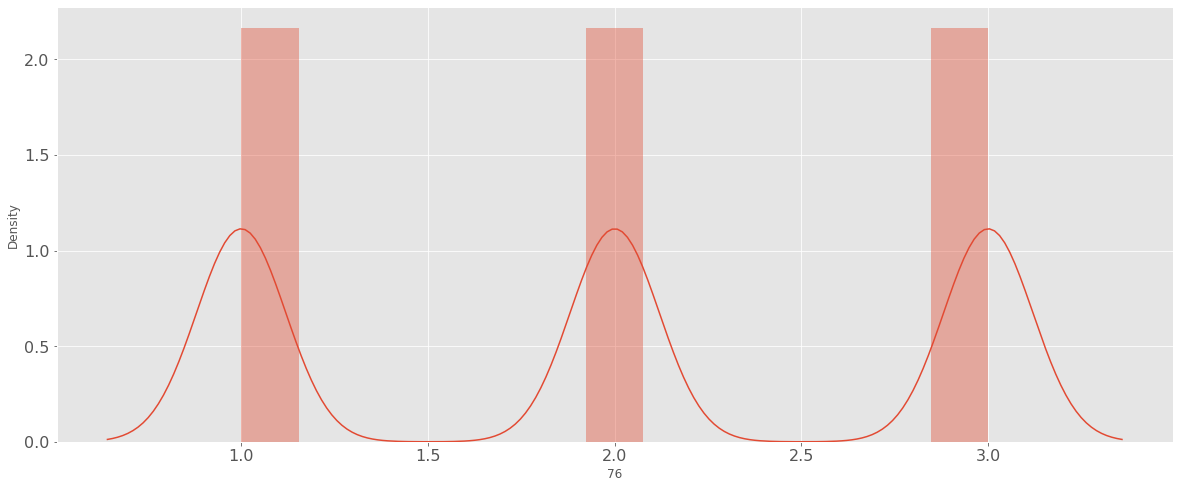

In [ ]:
#Finding Frequncy by file name
Freq_Class_Distribution = df_all_Balanced[76].value_counts()
Freq_Class_Distribution

sns.distplot(df_all_Balanced[76])
# plt.plot(df_all_Balanced[76])
# plt.ylabel('some numbers')
# plt.show()

## 3. Splitting data



1.   Split ->    Trainning_X  |  Trainiing_Y
2.   Split ->    Testing_X    |  Testing_Y





### 3.1 Create & Split Testing Data

In [ ]:
import random
df_train_array = df_all_Balanced.to_numpy()

#Splitting TESTING data ----> 30 videos - 20%

Testing_Data_Array = []
remove_Test_Data=[]
classes = ['passe_', 'Arabesque_', 'Pirouette_']

Unique_random_nums = []
# Generate 45 (testing and validation) unique numbers
for random_number in random.sample(range(1, 50), 45):
    if(len(str(random_number))== 1):
      random_number = "0"+ str(random_number)
      Unique_random_nums.append(random_number)
      # print('something here',random_number)
    else:
      Unique_random_nums.append(random_number)
      # print('something here',random_number)

print(Unique_random_nums[0:30])
# preparing the TESTING data
for count in range(30):  
  randomNum = Unique_random_nums[count]


#Adding each fram of randomely picked videos for testing array
  for i in range(15000):
    if(df_train_array[i][75] == classes[count%3] + str(randomNum)):
      Testing_Data_Array.append(df_train_array[i][0:77])
            
      # print('After', classes[count%3] + str(randomNum))
      remove_Test_Data.append(i)
      

# testing 
# # df_train_Unbalanced.value_counts(df_train_Unbalanced[76], sort = True)
# sampletest =pd.DataFrame(Testing_Data_Array)
# sampletest.value_counts(sampletest[75])

[15, 48, 20, 44, 11, 18, 14, 42, 41, '06', 39, 31, 30, 36, 38, 26, 12, 34, 32, '01', 33, 28, 23, '07', 47, '03', '09', 45, 29, '05']


In [ ]:
counts

Pirouette_08    100
Pirouette_23    100
Pirouette_02    100
Arabesque_17    100
Pirouette_13    100
               ... 
Arabesque_14    100
passe_47        100
Pirouette_38    100
passe_05        100
Pirouette_48    100
Name: 75, Length: 150, dtype: int64

In [ ]:
# Testing_Data_Array.__len__()

Testing_Dataset = pd.DataFrame(Testing_Data_Array)

#SPlitting X and Y values of Testing data
Y_Testing_df = Testing_Dataset[[76]]
X_Testing_df = Testing_Dataset.drop([76,75], axis=1)

# Testing_videos = Testing_Dataset[[75%100]]
X_Testing_df #----> 30 videos - 20%


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74
0,0.975368,0.898465,0.875962,0.975362,0.921767,0.883450,0.973362,0.930434,0.834201,0.976404,0.941989,0.800880,0.975601,0.902819,0.817707,0.979954,0.920666,0.808757,0.982123,0.920270,0.928815,0.978048,0.899915,0.858934,0.981151,0.988242,0.711693,0.976913,0.988199,0.682128,0.999985,1.000000,0.826359,0.989673,0.999953,0.837831,0.987842,0.966322,0.683607,0.996518,0.971838,0.831712,0.996858,0.980619,0.845556,0.974947,0.880979,0.904720,0.975767,0.880905,0.909253,0.977436,0.888900,0.838077,0.976231,0.861478,0.855765,0.993870,0.978259,0.785472,0.994006,0.981106,0.713054,0.996695,0.974708,0.838421,0.921575,0.999987,0.718566,0.917025,0.999989,0.676610,0.973474,0.996770,0.714947
1,0.975418,0.898131,0.879292,0.975375,0.921647,0.885186,0.976505,0.930407,0.835312,0.976480,0.941732,0.804362,0.975550,0.890903,0.808612,0.977200,0.911403,0.823516,0.982132,0.920073,0.925341,0.978103,0.887415,0.855163,0.984224,0.982733,0.717690,0.980087,0.988127,0.690987,1.000000,0.999933,0.829424,0.986450,1.000000,0.828606,0.987868,0.966285,0.691337,0.996546,0.971778,0.823625,0.996855,0.977457,0.844295,0.978025,0.880721,0.894223,0.975836,0.880621,0.910891,0.977481,0.875098,0.840660,0.979174,0.848077,0.872115,0.990938,0.975316,0.774991,0.991005,0.977981,0.707979,0.996709,0.974650,0.837577,0.921538,1.000000,0.737590,0.916981,1.000000,0.695828,0.973368,1.000000,0.723310
2,0.975471,0.884209,0.885410,0.978246,0.912096,0.891266,0.973367,0.920859,0.851249,0.976436,0.922315,0.809383,0.975540,0.890729,0.815724,0.980061,0.911134,0.828135,0.982279,0.910499,0.933919,0.978113,0.862681,0.868833,0.984314,0.982601,0.715419,0.980151,0.982259,0.702173,0.999891,0.995640,0.838376,0.986348,0.999786,0.812514,0.990843,0.966142,0.698526,0.993551,0.967861,0.809100,0.996834,0.971104,0.845607,0.981141,0.880437,0.881741,0.978671,0.866551,0.912156,0.980666,0.861376,0.852777,0.982050,0.847630,0.898910,0.990926,0.975217,0.773462,0.987974,0.971812,0.714208,0.996675,0.974506,0.831024,0.918381,0.996934,0.719538,0.916947,0.996798,0.694905,0.970259,0.990066,0.707361
3,0.975486,0.884042,0.889755,0.978246,0.911896,0.897513,0.973410,0.920772,0.852387,0.976460,0.913005,0.814265,0.972155,0.890552,0.820758,0.980052,0.910913,0.836004,0.982279,0.910245,0.928223,0.978131,0.850854,0.878673,0.984314,0.976933,0.710864,0.980162,0.970735,0.707107,0.992646,0.995573,0.839621,0.986359,0.996574,0.808164,0.990851,0.960777,0.697454,0.993529,0.967819,0.806854,0.996827,0.971072,0.845180,0.981155,0.880301,0.877927,0.978695,0.866389,0.914006,0.980668,0.861168,0.857022,0.982091,0.834718,0.907611,0.990889,0.975201,0.765297,0.987969,0.971784,0.711339,0.993542,0.974517,0.855881,0.921686,0.996866,0.720963,0.917071,0.996776,0.689333,0.970260,0.986737,0.693575
4,0.975481,0.883713,0.897549,0.978253,0.902411,0.907879,0.976551,0.911156,0.856693,0.976440,0.913042,0.810001,0.972161,0.878441,0.806302,0.980032,0.910698,0.835719,0.982261,0.909865,0.911675,0.980725,0.850756,0.868918,0.984295,0.971045,0.708500,0.980153,0.964902,0.721444,0.985428,0.991308,0.857811,0.986287,0.996391,0.785981,0.990827,0.960517,0.691760,0.993479,0.951929,0.804395,0.996752,0.970981,0.849927,0.981151,0.866108,0.860722,0.978691,0.851808,0.902857,0.980654,0.847474,0.873765,0.982077,0.834402,0.900753,0.984976,0.975173,0.791091,0.984986,0.971726,0.746654,0.993418,0.971477,0.866294,0.924948,0.993728,0.727767,0.920357,0.996695,0.685678,0.970236,0.983388,0.672327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.905500,0.934540,0.927646,0.148939,0.741812,0.821092,0.118620,0.680928,0.852543,0.738417,

### 3.2 Create & Split Validation Data

In [ ]:
#Removing the testing data from original array
remaining_array = np.delete(df_train_array, remove_Test_Data, axis=0)


#Getting VALIDATION data --> 15 videos 10%
Validation_Data_Array = []
remove_Validation_Data=[]

print(Unique_random_nums[30:])

# preparing the VALIDATION data
for count in range(15):  
  randomNum = Unique_random_nums[count+30]


  #To avoid duplication of genrated num
  # print('Before - ', classes[count%3] + str(randomNum))

  for i in range(remaining_array.__len__()):
    if(remaining_array[i][75] == classes[count%3] + str(randomNum)):
      Validation_Data_Array.append(remaining_array[i][0:77])
            
      # print('After', classes[count%3] + str(randomNum))
      remove_Validation_Data.append(i)

#Testing
# sampletest =pd.DataFrame(Validation_Data_Array)
# sampletest.value_counts(sampletest[75])      

[21, 35, '04', 17, 22, 40, 13, 43, 27, 46, 24, 16, 10, '08', 37]


In [ ]:
# remove_Validation_Data.__len__()
Validation_Dataset = pd.DataFrame(Validation_Data_Array)

#SPlitting X and Y values of Validation data
Y_Validation_df = Validation_Dataset[[76]]
X_Validation_df = Validation_Dataset.drop([76,75], axis=1)
validation_video_counts = Validation_Dataset[75].value_counts()

X_Validation_df #--> 15 videos 10%

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74
0,0.985357,0.795060,0.867078,0.979553,0.872318,0.835254,0.972085,0.859343,0.789056,0.922945,0.891077,0.845158,0.942241,0.928024,0.762559,0.983405,0.873078,0.850456,1.000000,0.895620,0.830741,0.972731,0.944578,0.863254,0.993976,0.933684,0.741178,0.981887,0.933800,0.717336,0.994064,0.988223,0.768630,0.977486,0.968416,0.746687,0.988684,0.929403,0.689008,0.890327,0.927106,0.799161,0.931375,0.993718,0.782400,0.993889,0.789717,0.905030,0.988332,0.789502,0.908453,0.981884,0.795183,0.609289,0.983115,0.795197,0.843290,0.963456,0.999999,0.379941,0.964092,0.991027,0.551950,0.930098,0.987593,0.666924,1.000000,0.997000,0.683847,1.0,1.0,0.609137,0.975258,0.950673,0.427698
1,0.985357,0.795060,0.867077,0.979554,0.872318,0.835269,0.972085,0.859343,0.789059,0.922945,0.891077,0.845161,0.942241,0.928024,0.762554,0.983405,0.873078,0.850496,1.000000,0.895620,0.831033,0.972731,0.944578,0.863298,0.993976,0.933684,0.741326,0.981887,0.933799,0.717498,0.994064,0.988211,0.767837,0.977486,0.968415,0.746583,0.988684,0.929401,0.689109,0.890327,0.927106,0.799225,0.931374,0.993719,0.782450,0.993889,0.789717,0.905026,0.988332,0.789502,0.908458,0.981884,0.795183,0.609319,0.983115,0.795200,0.843277,0.963456,1.000000,0.379822,0.964092,0.993899,0.551712,0.930097,0.987595,0.666987,1.000000,0.997000,0.683630,1.0,1.0,0.608776,0.975258,0.950672,0.427434
2,0.982365,0.718052,0.938413,0.973825,0.792150,0.843876,0.972038,0.785579,0.816763,0.919670,0.836407,0.824484,0.942222,0.867137,0.817556,0.980713,0.800039,0.821063,0.994897,0.826104,0.832552,0.969974,0.873202,0.840927,0.991174,0.886309,0.740233,0.981776,0.886473,0.728656,0.996889,0.949872,0.782877,0.994188,0.996812,0.713013,0.985862,0.882219,0.701970,0.895298,0.897977,0.776441,0.947765,0.999992,0.719574,0.990986,0.693477,0.858491,0.988223,0.693336,0.893948,0.981801,0.718172,0.480134,0.983029,0.718456,0.866677,0.929759,0.984909,0.696729,0.936314,0.997051,0.642882,0.969178,1.000000,0.488228,0.980628,0.997149,0.314839,0.0,0.0,0.000000,0.986257,0.999956,0.607347
3,0.982381,0.718067,0.934021,0.973809,0.798590,0.845461,0.972028,0.785597,0.816144,0.919674,0.836367,0.820901,0.942217,0.867154,0.817571,0.980694,0.800085,0.820970,0.997315,0.831661,0.829517,0.969974,0.873209,0.839693,0.991181,0.886301,0.740735,0.981785,0.886480,0.728062,0.996893,0.949855,0.782788,0.994207,0.996832,0.716572,0.985862,0.882198,0.700043,0.895306,0.897934,0.773464,0.947784,1.000000,0.727473,0.990993,0.693477,0.860300,0.988233,0.693336,0.894833,0.981791,0.718201,0.506425,0.983029,0.718476,0.867620,0.929696,0.984919,0.691452,0.933603,1.000000,0.642189,0.969207,0.999995,0.493715,0.977889,1.000000,0.289962,0.0,0.0,0.000000,0.986257,1.000000,0.618305
4,0.982381,0.718073,0.933874,0.973814,0.792182,0.845216,0.972041,0.785576,0.818403,0.919662,0.836372,0.821552,0.942230,0.867166,0.816472,0.980685,0.800080,0.820719,0.997315,0.831661,0.828690,0.969974,0.878489,0.839238,0.991167,0.886288,0.740016,0.981766,0.886467,0.728478,0.996855,0.946076,0.791081,0.994198,0.996794,0.714074,0.985862,0.882190,0.700583,0.895306,0.897936,0.774376,0.947774,0.999975,0.726377,0.990994,0.693471,0.860335,0.988233,0.693336,0.894754,0.981795,0.718184,0.504196,0.983029,0.718493,0.868352,0.929734,0.984908,0.699655,0.936291,0.997042,0.644791,0.969169,0.999956,0.501020,0.980609,0.997133,0.315939,0.0,0.0,0.000000,0.986239,0.999949,0.609808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

### 3.3 Create & Split Training Data

In [ ]:
#Remaining data = Training data --> 105 videos 70%
Trainning_Data_Array = np.delete(remaining_array, remove_Validation_Data, axis=0)

Trainning_dataset = pd.DataFrame(Trainning_Data_Array)

#SPlitting X and Y values of Training  data
Y_Train_df = Trainning_dataset[[76]]
X_Train_df = Trainning_dataset.drop([76,75], axis=1)
training_video_counts = Trainning_dataset[75].value_counts()
X_Train_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74
0,0,0.502139,0.874602,0,0.490367,0.854,0,0.338591,0.844759,0,1,0.890793,0,1,0.879074,0.00101764,0.65767,0.799725,0,0.526083,0.758486,0,0.596979,0.812226,0,0.500623,0.652001,0,0.666369,0.651329,0.905753,1,0.830851,0.129618,1,0.810868,0,0.661306,0.65438,0,0.503028,0.781053,0.0217758,0.993131,0.835659,0,0.502054,0.975707,0,0.496938,0.884287,0,0,0.849459,0,0,0.904949,0.954693,0.516118,0.808585,0.996546,0.499326,0.820038,0.988568,0.752625,0.832189,0,1,0.749048,0,1,0.711255,0.196381,1,0.814547
1,0.00292596,0.504021,0.880298,0.00330706,0,0.836926,0.00640953,0.00862362,0.842308,0.121147,0.994434,0.860188,0.281395,0.998478,0.859686,0,0.655278,0.79917,0.19775,0.507901,0.810404,0.182855,0.397212,0.78389,0.00498849,0.00628326,0.661356,0.00698391,0.330613,0.658896,0.780586,0.950918,0.870313,0.00863273,0.91107,0.838859,0.00432692,0.00033977,0.656673,0.00272325,0.501365,0.79452,0.021607,0.502027,0.809343,0.00197042,0.50582,0.957038,0.0833806,0.501871,0.9023,0.0760557,0.39989,0.820102,0.00305292,0.0276954,0.907878,0.038835,0.511291,0.806328,0.51468,0.0208895,0.818205,0.797074,0.502774,0.751685,0.156447,0.947967,0.776537,0.130569,0.972796,0.695712,0.195838,0.944045,0.727842
2,0.00520513,0.50442,0.879912,0.181548,0.00221654,0.816363,0.1113,0.0104391,0.824981,0.125648,0.994141,0.853848,0.566307,0.996533,0.855777,0.196744,0.335725,0.797527,0.296284,0.502124,0.84637,0.450817,0.396323,0.798799,0.00601177,0.501755,0.64794,0.00924766,0.67263,0.65031,0.625061,0.830366,0.830575,0,0.86566,0.831536,0.00673077,0.661419,0.654871,0.160899,0.501663,0.783079,0.0148548,0.336036,0.813946,0.0694755,0.504622,0.950403,0.16421,0.504593,0.913951,0.0765789,0.399204,0.824373,0.0980326,0.0290142,0.917424,0.00323625,0.498535,0.797175,0.500864,0.0149933,0.806421,0.790269,0.506189,0.756027,0.366884,0.896375,0.702358,0.261966,0.904075,0.594196,0,0.874029,0.706607
3,0.0886103,0.669423,0.884249,0.273961,0.0054561,0.816298,0.116842,0.335641,0.804694,0.248253,0.853027,0.830297,0.570898,0.995688,0.862705,0.199118,0.329917,0.802273,0.300375,0.514698,0.849068,0.455134,0.398783,0.803834,0.128379,0.503623,0.635623,0.145603,0.991279,0.639258,0.561979,0.804468,0.918505,0.00110025,0.790845,0.869456,0.147115,0.665157,0.631172,0.167139,0.377569,0.758849,0.493248,0.171791,0.793938,0.0708864,0.509928,0.944157,0.165769,0.509697,0.921439,0.0794569,0.400645,0.810954,0.0997286,0.0257171,0.929676,0,0.500603,0.787844,0.504318,0.0266173,0.819083,0.799796,0.496884,0.73105,0.418229,0.831662,0.744017,0.306577,0.862771,0.634274,0.0994297,0.777507,0.727682
4,0.0905815,0.675583,0.894614,0.363653,0.00647911,0.825949,0.22456,0.338137,0.798829,0.251897,0.712695,0.80131,0.712499,0.751173,0.829978,0.293758,0,0.802733,0.303785,0.518437,0.858083,0.544866,0.597458,0.836429,0.128208,0.503113,0.636099,0.148252,0.673748,0.639347,0.530347,0.755825,0.881984,0.00846346,0.731412,0.823582,0.144231,0.665553,0.632804,0.168841,0.499701,0.735529,0.492741,0.991723,0.78507,0.0727596,0.978946,0.929505,0.167867,0.516332,0.927836,0.155591,0.601344,0.812292,0.102442,0.0151665,0.946359,0.0323625,0.507671,0.798199,0.507772,0.503706,0.815284,0.989792,0.753308,0.767804,0.471522,0.74063,0.710732,0.392165,0.766828,0.610753,0.296795,0.707986,0.724431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10495,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10496,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

## 4. Normalization

Followed Min-Max Scaler Normalization



### 4.1. Normalization - Whole DF
Use this to normalize minMaxScaler the whole DataFrame columns 
Below is done by dropping the confidence score column

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# import numpy as np

# print(df_train_Normalize.shape)

# # build the scaler model
# scaler = MinMaxScaler()

# # fit using the train set
# scaler.fit(df_train_Normalize)

# # transform the train set
# X_scaled = scaler.transform(df_train_Normalize)

# # Verify minimum value of all features
# X_scaled.min(axis=0)

# # Verify maximum value of all features
# X_scaled.max(axis=0)


# e_dataframe=pd.DataFrame(X_scaled)
# e_dataframe

### 4.2. Normalization - Specific Columns
1. Use this to normalize minMaxScaler only the given column of the dataframe, 

In [ ]:
#Normalize using min max scalar 
def normalize_Data(X_df):
  X_df[skeletonJointColumn] = X_df[skeletonJointColumn].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
  print(X_df)
  return X_df

2. Standardization - Z-score Normalization


In [ ]:
from sklearn.preprocessing import StandardScaler
#Normalize Z-score normalization 
def standardize_Data(X_df):
  scaling=StandardScaler()
  X_df[skeletonJointColumn] = scaling.fit_transform(X_df[skeletonJointColumn])
  print(X_df)
  return X_df

### 4.3. Normalized Data Visualization

In [ ]:
# import matplotlib.pyplot as plt   #----> improve this visualization for whole dataframe
# plt.scatter(df_train_Balanced[0],df_train_Balanced[1])


##5. Feature Selection

Taking only the leg joints along with confidence score  ---> Joints =8, 9, 10, 11, 12, 13, 14, 19, 20, 21, 22, 23, 24

In [ ]:
# https://github.com/CMU-Perceptual-Computing-Lab/openpose/blob/master/doc/output.md

LegJointsWithZscore = []
jointsToConsider = [8, 9, 10, 11, 12, 13, 14, 19, 20, 21, 22, 23, 24]
# print(confidenceScoreColumns[8:15])


#Starting column of each joint is given by
# ((nx3))

# getting skeleton joint and confidence score column number
for i in jointsToConsider:
  jointStartingColumn = ((i*3))
  LegJointsWithZscore.append(jointStartingColumn)
  LegJointsWithZscore.append(jointStartingColumn+1)
  LegJointsWithZscore.append(jointStartingColumn+2)
print(LegJointsWithZscore)

#Removing unwanted columns 
def removeUnwatedColumns(X_df):
  X_df= X_df[LegJointsWithZscore]
  print("removing Z-score joints - ",X_df)
  return X_df



[24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74]


## 6. Re-shaping

In [ ]:
#Reshaping data Labels function
from keras.utils import to_categorical 

def formate_Labels(Labels_Array):
  # Convert class int to categorical data
  output_matrix = to_categorical(Labels_Array, num_classes = 4, dtype ="int32") 
  print('Shape of categorical label - ', output_matrix.shape)

  df_Y_Labels = pd.DataFrame(output_matrix)

  #delete column0 
  if(df_Y_Labels.shape[1] == 4):
    del df_Y_Labels[0]

  print('Shape of the df Label is - ', df_Y_Labels.shape)

  #Creating Y_Label np Array 
  Y_Label_Array = []

  # append each row in df_Y_label and add every 100th row
  for eachRowTemp in range(df_Y_Labels.__len__()):
    if(eachRowTemp%100 == 1):    
      Y_Label_Array.append(df_Y_Labels.loc[eachRowTemp])


  Y_Label = np.asarray(Y_Label_Array)
  print('Final np Array Shape - ', Y_Label.shape)    #------> Final Y_Testing 
  return Y_Label

### 5.1 Testing Data

**Normalize Testing Data**

In [ ]:
# Normalize Data using the splitted Df
# X_Testing_df_Normalized = standardize_Data(X_Testing_df)

**Feature Selection**

In [ ]:
X_Testing_df_Normalized = removeUnwatedColumns(X_Testing_df)
X_Testing_df_Normalized

removing Z-score joints -              24        25        26  ...        72        73        74
0     0.981151  0.988242  0.711693  ...  0.973474  0.996770  0.714947
1     0.984224  0.982733  0.717690  ...  0.973368  1.000000  0.723310
2     0.984314  0.982601  0.715419  ...  0.970259  0.990066  0.707361
3     0.984314  0.976933  0.710864  ...  0.970260  0.986737  0.693575
4     0.984295  0.971045  0.708500  ...  0.970236  0.983388  0.672327
...        ...       ...       ...  ...       ...       ...       ...
2995  0.211352  0.774221  0.789248  ...  0.960429  0.947219  0.870827
2996  0.158850  0.741813  0.770503  ...  0.957866  0.947181  0.853587
2997  0.158850  0.741956  0.771918  ...  0.957875  0.947170  0.855143
2998  0.106097  0.742362  0.792085  ...  0.957678  0.947231  0.830748
2999  0.055115  0.742329  0.803183  ...  0.952535  0.947325  0.808895

[3000 rows x 39 columns]


,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74
0,0.981151,0.988242,0.711693,0.976913,0.988199,0.682128,0.999985,1.000000,0.826359,0.989673,0.999953,0.837831,0.987842,0.966322,0.683607,0.996518,0.971838,0.831712,0.996858,0.980619,0.845556,0.993870,0.978259,0.785472,0.994006,0.981106,0.713054,0.996695,0.974708,0.838421,0.921575,0.999987,0.718566,0.917025,0.999989,0.676610,0.973474,0.996770,0.714947
1,0.984224,0.982733,0.717690,0.980087,0.988127,0.690987,1.000000,0.999933,0.829424,0.986450,1.000000,0.828606,0.987868,0.966285,0.691337,0.996546,0.971778,0.823625,0.996855,0.977457,0.844295,0.990938,0.975316,0.774991,0.991005,0.977981,0.707979,0.996709,0.974650,0.837577,0.921538,1.000000,0.737590,0.916981,1.000000,0.695828,0.973368,1.000000,0.723310
2,0.984314,0.982601,0.715419,0.980151,0.982259,0.702173,0.999891,0.995640,0.838376,0.986348,0.999786,0.812514,0.990843,0.966142,0.698526,0.993551,0.967861,0.809100,0.996834,0.971104,0.845607,0.990926,0.975217,0.773462,0.987974,0.971812,0.714208,0.996675,0.974506,0.831024,0.918381,0.996934,0.719538,0.916947,0.996798,0.694905,0.970259,0.990066,0.707361
3,0.984314,0.976933,0.710864,0.980162,0.970735,0.707107,0.992646,0.995573,0.839621,0.986359,0.996574,0.808164,0.990851,0.960777,0.697454,0.993529,0.967819,0.806854,0.996827,0.971072,0.845180,0.990889,0.975201,0.765297,0.987969,0.971784,0.711339,0.993542,0.974517,0.855881,0.921686,0.996866,0.720963,0.917071,0.996776,0.689333,0.970260,0.986737,0.693575
4,0.984295,0.971045,0.708500,0.980153,0.964902,0.721444,0.985428,0.991308,0.857811,0.986287,0.996391,0.785981,0.990827,0.960517,0.691760,0.993479,0.951929,0.804395,0.996752,0.970981,0.849927,0.984976,0.975173,0.791091,0.984986,0.971726,0.746654,0.993418,0.971477,0.866294,0.924948,0.993728,0.727767,0.920357,0.996695,0.685678,0.970236,0.983388,0.672327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.211352,0.774221,0.789248,0.185831,0.782407,0.765358,0.600190,0.765533,0.915415,0.819122,0.762067,0.836039,0.550420,0.765980,0.761100,0.148710,0.500147,0.875417,0.048112,0.350176,0.852964,0.100556,0.070297,0.751879,0.037400,0.000953,0.780145,0.070998,0.335651,0.747370,0.949774,0.925374,0.770349,0.952823,0.911973,0.717223,0.960429,0.947219,0.870827
2996,0.158850,0.741813,0.770503,0.185214,0.780645,0.763072,0.590235,0.765188,0.908208,0.791556,0.761900,0.857679,0.549791,0.732193,0.722911,0.123632,0.544950,0.846471,0.046777,0.293147,0.864304,0.034191,0.069276,0.772424,0.034953,0.000431,0.816504,0.035602,0.334875,0.749293,0.949604,0.922122,0.770458,0.947295,0.911975,0.732494,0.957866,0.947181,0.853587
2997,0.158850,0.741956,0.771918,0.185198,0.780804,0.764921,0.590231,0.765231,0.906961,0.791556,0.761862,0.856374,0.549799,0.732295,0.724476,0.123581,0.545383,0.848723,0.046753,0.293347,0.864427,0.034214,0.069349,0.773125,0.034988,0.000454,0.818171,0.035572,0.335036,0.748902,0.949604,0.922122,0.770339,0.947295,0.911978,0.733005,0.957875,0.947170,0.855143
2998,0.106097,0.742362,0.792085,0.162661,0.781738,0.787226,0.589953,0.765560,0.893666,0.777773,0.761857,0.883523,0.499932,0.700397,0.719580,0.049621,0.545136,0.828465,0.023231,0.350596,0.860694,0.000283,0.000146,0.799107,0.000738,0.000000,0.829023,0.017197,0.335133,0.757916,0.944154,0.922047,0.761818,0.944484,0.911911,0.770731,0.957678,0.947231,0.830748


In [ ]:
# # Removing skeleton joints
# for i in range(24,45):
#   if(i%3==2):
#     # print(X_Testing_df_Normalized[i])
#     del X_Testing_df_Normalized[i]

# for i in range(57,75):
#   if(i%3==2):
#     # print(X_Testing_df_Normalized[i])
#     del X_Testing_df_Normalized[i]
# X_Testing_df_Normalized

**Re-shaping Testing Data**

In [ ]:
#Re-shape Testing Data
#Convert DF to np array, and reshape it before feeding to LSTM
test = X_Testing_df_Normalized.to_numpy().astype('float32')
X_Testing = test.reshape(30,100,X_Testing_df_Normalized.shape[1])

X_Testing

array([[[0.9811514 , 0.98824203, 0.711693  , ..., 0.9734743 ,
         0.9967704 , 0.714947  ],
        [0.9842236 , 0.98273283, 0.71769   , ..., 0.9733683 ,
         1.        , 0.72331   ],
        [0.9843144 , 0.9826014 , 0.715419  , ..., 0.97025925,
         0.99006605, 0.707361  ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.816052  , 0.76503736, 0.607126  , ..., 0.98494565,
         0.9999814 , 0.250085  ],
        [0.816052  , 0.824967  , 0.619311  , ..., 0.9849641 ,
         0.9999721 , 0.278926  ],
        [0.7903426 , 0.82300866, 0.633062  , ..., 0.98497224,
         0.9999721 , 0.275815  ],
        ...,
        [0.94757897, 0.58830583, 0.520675  , ..., 0.969788  ,
         1.        , 0.170543  ],
        [1. 

In [ ]:
# Flatten the labels array
if(Y_Testing_df.shape[1] == 1):
  test = Y_Testing_df.to_numpy().astype('float32')
  Y_Testing_Labels = test. flatten()

Y_Testing_df.shape

#Re-shape the labels array --> (30, 3)
Y_Testing = formate_Labels(Y_Testing_Labels)
Y_Testing

Shape of categorical label -  (3000, 4)
Shape of the df Label is -  (3000, 3)
Final np Array Shape -  (30, 3)


array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]], dtype=int32)

### 5.2 Trainning Data

**1 Normalize Trainninf Data**

In [ ]:
# Normalize Data using the splitted Df
# X_Train_df_Normalized = standardize_Data(X_Train_df)

**2. Features Selection**

In [ ]:
X_Train_df_Normalized = removeUnwatedColumns(X_Train_df)
X_Train_df_Normalized

removing Z-score joints -                 24          25        26  ...         72        73        74
0               0    0.500623  0.652001  ...   0.196381         1  0.814547
1      0.00498849  0.00628326  0.661356  ...   0.195838  0.944045  0.727842
2      0.00601177    0.501755   0.64794  ...          0  0.874029  0.706607
3        0.128379    0.503623  0.635623  ...  0.0994297  0.777507  0.727682
4        0.128208    0.503113  0.636099  ...   0.296795  0.707986  0.724431
...           ...         ...       ...  ...        ...       ...       ...
10495           0           0         0  ...          0         0         0
10496           0           0         0  ...          0         0         0
10497           0           0         0  ...          0         0         0
10498           0           0         0  ...          0         0         0
10499           0           0         0  ...          0         0         0

[10500 rows x 39 columns]


,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74
0,0,0.500623,0.652001,0,0.666369,0.651329,0.905753,1,0.830851,0.129618,1,0.810868,0,0.661306,0.65438,0,0.503028,0.781053,0.0217758,0.993131,0.835659,0.954693,0.516118,0.808585,0.996546,0.499326,0.820038,0.988568,0.752625,0.832189,0,1,0.749048,0,1,0.711255,0.196381,1,0.814547
1,0.00498849,0.00628326,0.661356,0.00698391,0.330613,0.658896,0.780586,0.950918,0.870313,0.00863273,0.91107,0.838859,0.00432692,0.00033977,0.656673,0.00272325,0.501365,0.79452,0.021607,0.502027,0.809343,0.038835,0.511291,0.806328,0.51468,0.0208895,0.818205,0.797074,0.502774,0.751685,0.156447,0.947967,0.776537,0.130569,0.972796,0.695712,0.195838,0.944045,0.727842
2,0.00601177,0.501755,0.64794,0.00924766,0.67263,0.65031,0.625061,0.830366,0.830575,0,0.86566,0.831536,0.00673077,0.661419,0.654871,0.160899,0.501663,0.783079,0.0148548,0.336036,0.813946,0.00323625,0.498535,0.797175,0.500864,0.0149933,0.806421,0.790269,0.506189,0.756027,0.366884,0.896375,0.702358,0.261966,0.904075,0.594196,0,0.874029,0.706607
3,0.128379,0.503623,0.635623,0.145603,0.991279,0.639258,0.561979,0.804468,0.918505,0.00110025,0.790845,0.869456,0.147115,0.665157,0.631172,0.167139,0.377569,0.758849,0.493248,0.171791,0.793938,0,0.500603,0.787844,0.504318,0.0266173,0.819083,0.799796,0.496884,0.73105,0.418229,0.831662,0.744017,0.306577,0.862771,0.634274,0.0994297,0.777507,0.727682
4,0.128208,0.503113,0.636099,0.148252,0.673748,0.639347,0.530347,0.755825,0.881984,0.00846346,0.731412,0.823582,0.144231,0.665553,0.632804,0.168841,0.499701,0.735529,0.492741,0.991723,0.78507,0.0323625,0.507671,0.798199,0.507772,0.503706,0.815284,0.989792,0.753308,0.767804,0.471522,0.74063,0.710732,0.392165,0.766828,0.610753,0.296795,0.707986,0.724431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10495,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10496,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10497,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10498,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# # Removing skeleton joints
# for i in range(24,45):
#   if(i%3==2):
#     # print(X_Testing_df_Normalized[i])
#     del X_Train_df_Normalized[i]

# for i in range(57,75):
#   if(i%3==2):
#     # print(X_Testing_df_Normalized[i])
#     del X_Train_df_Normalized[i]
# X_Train_df_Normalized

**3 Re-shape trainning data**

In [ ]:
# Re-shape Training Data

#Convert DF to np array, and reshape it before feeding to LSTM
train = X_Train_df_Normalized.to_numpy().astype('float32')
X_Train = train.reshape(105,100,X_Train_df_Normalized.shape[1])
X_Train


array([[[0.0000000e+00, 5.0062269e-01, 6.5200102e-01, ...,
         1.9638129e-01, 1.0000000e+00, 8.1454700e-01],
        [4.9884883e-03, 6.2832558e-03, 6.6135597e-01, ...,
         1.9583814e-01, 9.4404531e-01, 7.2784197e-01],
        [6.0117678e-03, 5.0175476e-01, 6.4793998e-01, ...,
         0.0000000e+00, 8.7402886e-01, 7.0660698e-01],
        ...,
        [7.5637418e-01, 3.3669195e-01, 6.4291900e-01, ...,
         5.0139183e-01, 8.7510908e-01, 7.1093899e-01],
        [7.5223845e-01, 1.7162912e-01, 6.4572799e-01, ...,
         4.0447417e-01, 9.4387549e-01, 6.7358601e-01],
        [7.5228107e-01, 1.7027058e-01, 6.4820099e-01, ...,
         4.0444022e-01, 9.4384718e-01, 6.7514998e-01]],

       [[8.8201370e-04, 1.0000000e+00, 7.6994097e-01, ...,
         4.2269075e-01, 9.8978978e-01, 6.2789798e-01],
        [0.0000000e+00, 9.9621016e-01, 7.7660501e-01, ...,
         5.7851046e-01, 9.8941690e-01, 5.8984798e-01],
        [3.3923605e-04, 9.9412364e-01, 7.7751398e-01, ...,
         5.271

In [ ]:
print(X_Train_df_Normalized.shape[1])

39


In [ ]:
# Flatten the labels array
if(Y_Train_df.shape[1] == 1):
  train = Y_Train_df.to_numpy().astype('float32')
  Y_Train_Label = train. flatten()

 
#Re-shape the labels arra --> (105, 3)
Y_Train = formate_Labels(Y_Train_Label)
Y_Train

Shape of categorical label -  (10500, 4)
Shape of the df Label is -  (10500, 3)
Final np Array Shape -  (105, 3)


array([[1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1,

### 5.3 Validation Data

**1 Normalize Trainninf Data**

In [ ]:
# Normalize Data using the splitted Df
# X_Validation_df_Normalized = standardize_Data(X_Validation_df)

**2. Features Selection**

In [ ]:
X_Validation_df_Normalized = removeUnwatedColumns(X_Validation_df)
X_Validation_df_Normalized

removing Z-score joints -              24        25        26  ...        72        73        74
0     0.993976  0.933684  0.741178  ...  0.975258  0.950673  0.427698
1     0.993976  0.933684  0.741326  ...  0.975258  0.950672  0.427434
2     0.991174  0.886309  0.740233  ...  0.986257  0.999956  0.607347
3     0.991181  0.886301  0.740735  ...  0.986257  1.000000  0.618305
4     0.991167  0.886288  0.740016  ...  0.986239  0.999949  0.609808
...        ...       ...       ...  ...       ...       ...       ...
1495  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000
1496  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000
1497  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000
1498  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000
1499  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000

[1500 rows x 39 columns]


,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74
0,0.993976,0.933684,0.741178,0.981887,0.933800,0.717336,0.994064,0.988223,0.768630,0.977486,0.968416,0.746687,0.988684,0.929403,0.689008,0.890327,0.927106,0.799161,0.931375,0.993718,0.782400,0.963456,0.999999,0.379941,0.964092,0.991027,0.551950,0.930098,0.987593,0.666924,1.000000,0.997000,0.683847,1.0,1.0,0.609137,0.975258,0.950673,0.427698
1,0.993976,0.933684,0.741326,0.981887,0.933799,0.717498,0.994064,0.988211,0.767837,0.977486,0.968415,0.746583,0.988684,0.929401,0.689109,0.890327,0.927106,0.799225,0.931374,0.993719,0.782450,0.963456,1.000000,0.379822,0.964092,0.993899,0.551712,0.930097,0.987595,0.666987,1.000000,0.997000,0.683630,1.0,1.0,0.608776,0.975258,0.950672,0.427434
2,0.991174,0.886309,0.740233,0.981776,0.886473,0.728656,0.996889,0.949872,0.782877,0.994188,0.996812,0.713013,0.985862,0.882219,0.701970,0.895298,0.897977,0.776441,0.947765,0.999992,0.719574,0.929759,0.984909,0.696729,0.936314,0.997051,0.642882,0.969178,1.000000,0.488228,0.980628,0.997149,0.314839,0.0,0.0,0.000000,0.986257,0.999956,0.607347
3,0.991181,0.886301,0.740735,0.981785,0.886480,0.728062,0.996893,0.949855,0.782788,0.994207,0.996832,0.716572,0.985862,0.882198,0.700043,0.895306,0.897934,0.773464,0.947784,1.000000,0.727473,0.929696,0.984919,0.691452,0.933603,1.000000,0.642189,0.969207,0.999995,0.493715,0.977889,1.000000,0.289962,0.0,0.0,0.000000,0.986257,1.000000,0.618305
4,0.991167,0.886288,0.740016,0.981766,0.886467,0.728478,0.996855,0.946076,0.791081,0.994198,0.996794,0.714074,0.985862,0.882190,0.700583,0.895306,0.897936,0.774376,0.947774,0.999975,0.726377,0.929734,0.984908,0.699655,0.936291,0.997042,0.644791,0.969169,0.999956,0.501020,0.980609,0.997133,0.315939,0.0,0.0,0.000000,0.986239,0.999949,0.609808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
1496,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
1497,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
1498,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000


**3 Re-shape validation data**

In [ ]:
# Re-shape Training Data

#Convert DF to np array, and reshape it before feeding to LSTM
train = X_Validation_df_Normalized.to_numpy().astype('float32')
X_Validation = train.reshape(15,100,X_Validation_df_Normalized.shape[1])
X_Validation

array([[[9.9397624e-01, 9.3368393e-01, 7.4117798e-01, ...,
         9.7525775e-01, 9.5067340e-01, 4.2769799e-01],
        [9.9397624e-01, 9.3368393e-01, 7.4132597e-01, ...,
         9.7525775e-01, 9.5067233e-01, 4.2743400e-01],
        [9.9117398e-01, 8.8630885e-01, 7.4023300e-01, ...,
         9.8625743e-01, 9.9995595e-01, 6.0734701e-01],
        ...,
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00]],

       [[7.1360481e-01, 9.8026216e-01, 7.6302499e-01, ...,
         7.1671408e-01, 9.9329209e-01, 7.6362902e-01],
        [7.1608490e-01, 9.8516536e-01, 7.4481302e-01, ...,
         7.1673191e-01, 9.9655735e-01, 7.6574898e-01],
        [7.2090584e-01, 9.9015474e-01, 7.4548000e-01, ...,
         7.167

In [ ]:
# Flatten the labels array
if(Y_Validation_df.shape[1] == 1):
  train = Y_Validation_df.to_numpy().astype('float32')
  Y_Validation_Label = train. flatten()

 
#Re-shape the labels arra --> (105, 3)
Y_Validation = formate_Labels(Y_Validation_Label)
Y_Validation

Shape of categorical label -  (1500, 4)
Shape of the df Label is -  (1500, 3)
Final np Array Shape -  (15, 3)


array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]], dtype=int32)

#Model Implementation

In [ ]:
#Import libraries
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import Activation
from keras.layers import Masking
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping


In [ ]:
tf.keras.backend.clear_session()


# opt = tf.optimizers.RMSprop(0.00005)


opt = tf.optimizers.Adam(lr= 0.0001)
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=5,mode='min')

model = Sequential()
model.add(Masking(mask_value=0.0, input_shape=(X_Train.shape[1:])))
model.add(Dropout(0.2))
model.add(LSTM(120, return_sequences = False))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer= opt ,metrics = ['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking (Masking)            (None, 100, 39)           0         
_________________________________________________________________
dropout (Dropout)            (None, 100, 39)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 120)               76800     
_________________________________________________________________
dropout_1 (Dropout)          (None, 120)               0         
_________________________________________________________________
dense (Dense)                (None, 3)                 363       
Total params: 77,163
Trainable params: 77,163
Non-trainable params: 0
_________________________________________________________________


In [ ]:

history = model.fit(X_Train, Y_Train, validation_data=(X_Testing, Y_Testing), epochs=300, batch_size=16)


In [ ]:
model.evaluate(X_Testing, Y_Testing)

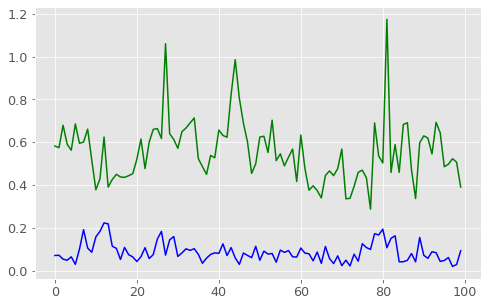

In [ ]:
plt.plot(history.history['val_loss'], color="green")
plt.plot(history.history['loss'], color="blue")

size=16
params = {'legend.fontsize': 'large',
          'figure.figsize': (8,5),
          'axes.labelsize': size*0.8,
          'axes.titlesize': size*0.8,
          'xtick.labelsize': size*0.8,
          'ytick.labelsize': size*0.8,
          'axes.titlepad': size*0.8,
          'font.size': size}
plt.rcParams.update(params)
plt.show()

In [ ]:
model.evaluate(X_Testing, Y_Testing)

1/1 [==============================] - 0s 35ms/step - loss: 0.8459 - accuracy: 0.7000


[0.845898449420929, 0.699999988079071]

In [ ]:
model.evaluate(X_Testing, Y_Testing)

1/1 [==============================] - 0s 42ms/step - loss: 0.0912 - accuracy: 0.9667


[0.09115497767925262, 0.9666666388511658]

In [ ]:
model.evaluate(X_Testing, Y_Testing)

1/1 [==============================] - 0s 68ms/step - loss: 0.0663 - accuracy: 0.9667


[0.06626555323600769, 0.9666666388511658]

In [ ]:
results2 = new_model.predict(X_Train)
print(results2)

In [ ]:
# Checking how many predicted values are correct and wrong

results = model.predict(X_Train)

predecited_Values = []
expected_Values = []
correct = 0
wrong = 0


# Getting the count of predicted and expected 
for j in range(30):
  predecited_Values.append(results[j].argmax(axis=0))
  expected_Values.append(Y_Train[j].argmax(axis=0))

#Check if the value is corect of wrong
def evaluateOutput(expect, pred):
  if(expect == pred):
    return True
  else:
    return False

print('        Expected', '  ', 'Predcited', '      ', 'results')

for i in range(30): 
  result= evaluateOutput(expected_Values[i], predecited_Values[i])
  print('results   ',expected_Values[i], '          ',predecited_Values[i],'        ', result)
  if(result == True):
    correct = correct + 1
  else:
    wrong = wrong + 1  

print('Correct Values = ', correct)
print('Wrong Values = ', wrong)

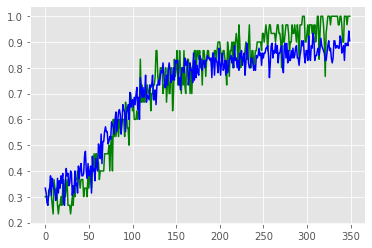

In [ ]:
plt.plot(history.history['val_accuracy'], color="green")
plt.plot(history.history['accuracy'], color="blue")
plt.show()

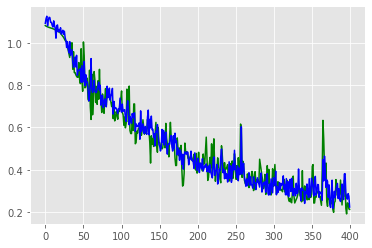

<Figure size 576x576 with 0 Axes>

In [ ]:
plt.plot(history.history['val_loss'], color="green")
plt.plot(history.history['loss'], color="blue")
plt.figure(figsize=(8, 8))
plt.show()

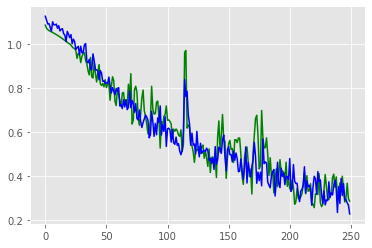

<Figure size 288x288 with 0 Axes>

In [ ]:
plt.plot(history.history['val_loss'], color="green")
plt.plot(history.history['loss'], color="blue")
plt.figure(figsize=(4, 4))
plt.show()

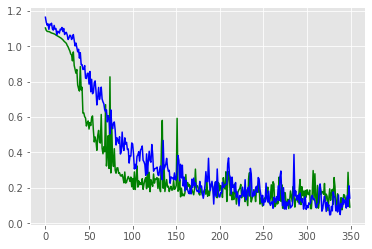

<Figure size 288x288 with 0 Axes>

In [ ]:
# plt.plot(hitory.history['val_loss'], color="green")
plt.plot(history.history['loss'], color="blue")
plt.figure(figsize=(4, 4))
plt.show()

**Confusion Matrix**

In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Trained Models/93_NewArchitecture_smallSpikes')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking (Masking)            (None, 100, 39)           0         
_________________________________________________________________
dropout (Dropout)            (None, 100, 39)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 70)                30800     
_________________________________________________________________
dropout_1 (Dropout)          (None, 70)                0         
_________________________________________________________________
dense (Dense)                (None, 3)                 213       
Total params: 31,013
Trainable params: 31,013
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.evaluate(X_Testing, Y_Testing)

1/1 [==============================] - 0s 47ms/step - loss: 0.3839 - accuracy: 0.9000


[0.38394850492477417, 0.8999999761581421]

Confusion Matrix



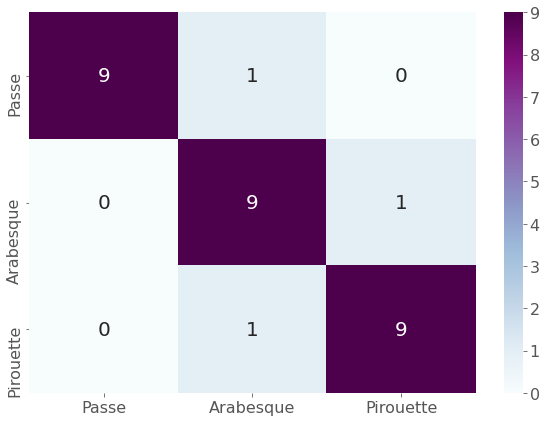

In [ ]:
from sklearn.metrics import confusion_matrix

Y_pred = model.predict(X_Testing)

y_test = (np.argmax(Y_Testing, axis=1))
y_pred = (np.argmax(Y_pred, axis=1))


confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix\n')
# print(confusion)


df_cm = pd.DataFrame(confusion, index = ['Passe', 'Arabesque', 'Pirouette'],
                  columns = ['Passe', 'Arabesque', 'Pirouette'])
plt.figure(figsize = (10,7))
size=20
params = {'legend.fontsize': 'large',
          'figure.figsize': (20,8),
          'axes.labelsize': size*0.8,
          'axes.titlesize': size*0.8,
          'xtick.labelsize': size*0.8,
          'ytick.labelsize': size*0.8,
          'axes.titlepad': size*0.8,
          'font.size': size}
plt.rcParams.update(params)
sns.heatmap(df_cm, annot=True, cmap="BuPu")

**Classification Report -> Accuracy | F1 Score | Precision | Recall**

In [ ]:
#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['Passe', 'Arabesque', 'Pirouette']))


Accuracy: 0.90

Micro Precision: 0.90
Micro Recall: 0.90
Micro F1-score: 0.90

Macro Precision: 0.91
Macro Recall: 0.90
Macro F1-score: 0.90

Weighted Precision: 0.91
Weighted Recall: 0.90
Weighted F1-score: 0.90

Classification Report

              precision    recall  f1-score   support

       Passe       1.00      0.90      0.95        10
   Arabesque       0.82      0.90      0.86        10
   Pirouette       0.90      0.90      0.90        10

    accuracy                           0.90        30
   macro avg       0.91      0.90      0.90        30
weighted avg       0.91      0.90      0.90        30



**F1 Score**

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

print(precision_recall_fscore_support(y_test, y_pred, average='weighted'))

(0.906060606060606, 0.9, 0.9015037593984964, None)


In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

precision = precision_score(y_test, y_pred, labels=[0,1,2], average='macro')
recall = recall_score(y_test, y_pred, labels=[0,1,2], average='macro')
f1_score = f1_score(y_test, y_pred, average='macro')
print('Precision: %.3f' % precision)
print('recall: %.3f' % recall)
print('f1_score: %.3f' % f1_score)

Precision: 0.906
recall: 0.900
f1_score: 0.902


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/Trained Models/93_NewArchitecture_smallSpikes/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/Trained Models/93_NewArchitecture_smallSpikes/assets


In [ ]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Trained Models/temp2')

# Check its architecture
new_model.summary()

OSError: ignored

In [ ]:
X_values = X_Validation
Y_Values = Y_Validation

results = model.predict(X_values)

predecited_Values = []
expected_Values = []
correct = 0
wrong = 0


# Getting the count of predicted and expected 
for j in range(X_values.__len__()):
  predecited_Values.append(results[j].argmax(axis=0))
  expected_Values.append(Y_Values[j].argmax(axis=0))

#Check if the value is corect of wrong
def evaluateOutput(expect, pred):
  if(expect == pred):
    return True
  else:
    return False

print('        Expected', '  ', 'Predcited', '      ', 'results')

for i in range(X_values.__len__()): 
  result= evaluateOutput(expected_Values[i], predecited_Values[i])
  print('results   ',expected_Values[i], '          ',predecited_Values[i],'        ', result)
  if(result == True):
    correct = correct + 1
  else:
    wrong = wrong + 1  

print('Correct Values = ', correct)
print('Wrong Values = ', wrong)

        Expected    Predcited        results
results    0            0          True
results    1            1          True
results    2            0          False
results    0            1          False
results    1            1          True
results    2            2          True
results    0            0          True
results    1            1          True
results    2            2          True
results    0            0          True
results    1            1          True
results    2            2          True
results    0            0          True
results    1            1          True
results    2            0          False
Correct Values =  12
Wrong Values =  3


In [ ]:

passe = []
arabeque = []
piroutte = []

# Trainning_dataset
df_Group = df_train_Unbalanced.groupby(df_train_Unbalanced[75])
#Iterate through the created groups of each class
for eachGroup in df_Group.groups: 
  groupLength = df_Group.get_group(eachGroup).__len__()
  # print(df_student,': ',groupLength)
  # print(eachGroup)

  # appending Passe frames
  if(eachGroup[0:5] == 'passe'):
    passe.append(df_Group.get_group(eachGroup))
    
  # appending Arabesque frames
  if(eachGroup[0:9] == 'Arabesque'):
    arabeque.append(df_Group.get_group(eachGroup))
    

  # appending Piroutte frames
  if(eachGroup[0:6] == 'Piroue'):
    piroutte.append(df_Group.get_group(eachGroup))


from sklearn.preprocessing import StandardScaler
#Normalize Z-score normalization 

# scaling=StandardScaler()
   
# Trainning_dataset[skeletonJointColumn] = scaling.fit_transform(Trainning_dataset[skeletonJointColumn])


In [ ]:
for i in passe:
  
  print(i) 

In [ ]:
correct = []
wrong = []
classes = [passe, arabeque, piroutte]
for item in classes:
  for df_student in item:
      video = df_student.iloc[1][75]
      # frames hadnling
          #Normalize
      
      if(df_student.__len__() < 100):
        addingFramCount = 100 - df_student.__len__()
        for eachFrame in range(addingFramCount):
          newRows = [0]*75    
          newRows.append('temp')
          newRows.append(1)      
          df_student.loc[len(df_student.index)] = newRows
          # print('After Adding', df_student.__len__())         
      else:
        framesToRemove = df_student.__len__() - 100             
        # print('Removing Frames - ', framesToRemove)

        for steps in range(framesToRemove):         #---> Removing the frames in random 
          num2 = random.randint(0, 100)
          df_student.drop(df_student.index[[num2]], inplace = True)


      df_student[skeletonJointColumn] = df_student[skeletonJointColumn].apply(lambda x: (x - x.min()) / (x.max() - x.min()))   

      #Removing unwanted columns 
      df_student= df_student[LegJointsWithZscore] 

      # if video[0:8] == 'passe_06':
        # print(df_student)


      # Re-shape the df
      test = df_student.to_numpy().astype('float32')
      df_student = test.reshape(1,df_student.__len__(),df_student.shape[1])

      # new_model.summary()
      prediction = model.predict(df_student)

      clasName = ''
      # Name the predicted class
      if(prediction[0][0] > prediction[0][1] and prediction[0][0]>prediction[0][2]):
        clasName='PASSE'
      elif(prediction[0][1] > prediction[0][0] and prediction[0][1] > prediction[0][2]):
        clasName='ARABESQUE'
      elif(prediction[0][2] > prediction[0][0] and prediction[0][2]>prediction[0][1]):
        clasName='PIROUETTE'

      if(video[0:5] =='passe'):
        videoClass = 'PASSE'
      elif(video[0:5] =='Arabe'):
        videoClass = 'ARABESQUE'
      else:
        videoClass = 'PIROUETTE'

      if clasName == videoClass:
        correct.append(clasName)
      else:
        wrong.append(clasName)

      print(prediction, clasName,'---------------', video)
print('Correct values -', correct.__len__())
print('wrong values -', wrong.__len__())

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1758: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


[[0.887161   0.06654713 0.04629178]] PASSE --------------- passe_01
[[0.9425926  0.01012844 0.04727895]] PASSE --------------- passe_02
[[0.97281384 0.00969814 0.01748808]] PASSE --------------- passe_03
[[0.96533006 0.01274035 0.02192964]] PASSE --------------- passe_04
[[0.12890811 0.11015464 0.76093733]] PIROUETTE --------------- passe_05
[[0.7966551  0.02865658 0.1746882 ]] PASSE --------------- passe_06
[[0.38603312 0.2559536  0.35801324]] PASSE --------------- passe_07
[[0.96470594 0.00874076 0.02655341]] PASSE --------------- passe_08
[[0.95981    0.01685567 0.02333435]] PASSE --------------- passe_09
[[0.805753   0.02064857 0.17359847]] PASSE --------------- passe_10
[[0.9613262  0.01723273 0.02144111]] PASSE --------------- passe_11
[[0.04146919 0.91043264 0.04809812]] ARABESQUE --------------- passe_12
[[0.9430574  0.02119769 0.03574488]] PASSE --------------- passe_13
[[0.94014865 0.03171366 0.02813758]] PASSE --------------- passe_14
[[0.9532135  0.01472213 0.03206426]] PAS

In [ ]:
passe

In [ ]:
ballet_csv_output = '/content/drive/MyDrive/Colab Notebooks/temp.csv'
body_keypoints_df.to_csv (ballet_csv_output, index = False, header=False)